In [1]:
# Install required library
!pip install pyarrow

import pandas as pd

# Load the data from the provided Parquet file
data = pd.read_parquet('green_tripdata_2023-05.parquet')

# Display information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[us]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[us]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [2]:
# Drop the 'ehail_fee' column from the DataFrame
data = data.drop(columns=['ehail_fee'])

# Verify the updated DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69174 entries, 0 to 69173
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               69174 non-null  int32         
 1   lpep_pickup_datetime   69174 non-null  datetime64[us]
 2   lpep_dropoff_datetime  69174 non-null  datetime64[us]
 3   store_and_fwd_flag     64442 non-null  object        
 4   RatecodeID             64442 non-null  float64       
 5   PULocationID           69174 non-null  int32         
 6   DOLocationID           69174 non-null  int32         
 7   passenger_count        64442 non-null  float64       
 8   trip_distance          69174 non-null  float64       
 9   fare_amount            69174 non-null  float64       
 10  extra                  69174 non-null  float64       
 11  mta_tax                69174 non-null  float64       
 12  tip_amount             69174 non-null  float64       
 13  t

In [3]:
# Calculate trip_duration in minutes
data['trip_duration'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60

# Display a preview of the new column
data[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
0,2023-05-01 00:52:10,2023-05-01 01:05:26,13.266667
1,2023-05-01 00:29:49,2023-05-01 00:50:11,20.366667
2,2023-05-01 00:25:19,2023-05-01 00:32:12,6.883333
3,2023-05-01 00:07:06,2023-05-01 00:27:33,20.450000
4,2023-05-01 00:43:31,2023-05-01 00:46:59,3.466667


In [4]:
# Extract weekday from dropoff datetime
data['weekday'] = data['lpep_dropoff_datetime'].dt.day_name()

# Value counts for weekdays
weekday_counts = data['weekday'].value_counts()
print(weekday_counts)


weekday
Wednesday    11980
Tuesday      11062
Monday       10934
Thursday     10085
Friday        9737
Saturday      8144
Sunday        7232
Name: count, dtype: int64


In [5]:
# Extract hour of the day from dropoff datetime
data['hourofday'] = data['lpep_dropoff_datetime'].dt.hour

# Value counts for hours of the day
hourofday_counts = data['hourofday'].value_counts()
print(hourofday_counts)


hourofday
18    5497
17    5260
16    4986
19    4707
15    4693
14    4140
12    3893
11    3729
13    3676
9     3620
10    3548
20    3458
8     3088
21    2999
22    2461
7     2376
23    1896
0     1337
6      915
1      873
2      645
3      524
4      439
5      414
Name: count, dtype: int64


In [6]:
# Check and handle missing values
data['store_and_fwd_flag'].fillna('N', inplace=True)
data['RatecodeID'].fillna(data['RatecodeID'].mode()[0], inplace=True)
data['passenger_count'].fillna(data['passenger_count'].median(), inplace=True)
data['payment_type'].fillna(data['payment_type'].mode()[0], inplace=True)
data['trip_type'].fillna(data['trip_type'].mode()[0], inplace=True)
data['congestion_surcharge'].fillna(data['congestion_surcharge'].median(), inplace=True)

# Verify missing values are handled
print(data.isnull().sum())


VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
weekday                  0
hourofday                0
dtype: int64


<ipython-input-6-66918e107302>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['store_and_fwd_flag'].fillna('N', inplace=True)
<ipython-input-6-66918e107302>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

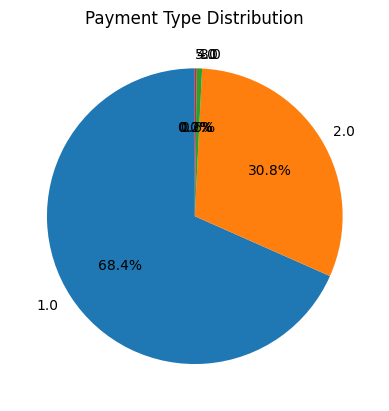

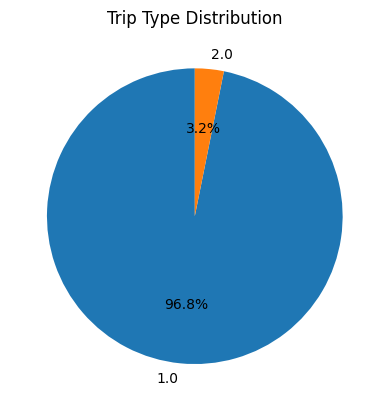

In [7]:
import matplotlib.pyplot as plt

# Payment type distribution pie chart
payment_type_counts = data['payment_type'].value_counts()
payment_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Payment Type Distribution')
plt.ylabel('')
plt.show()

# Trip type distribution pie chart
trip_type_counts = data['trip_type'].value_counts()
trip_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Trip Type Distribution')
plt.ylabel('')
plt.show()


In [8]:
avg_total_by_weekday = data.groupby('weekday')['total_amount'].mean()
print(avg_total_by_weekday)


weekday
Friday       23.763881
Monday       22.877701
Saturday     23.861000
Sunday       24.365744
Thursday     24.015407
Tuesday      23.908406
Wednesday    24.135164
Name: total_amount, dtype: float64


In [9]:
avg_total_by_payment_type = data.groupby('payment_type')['total_amount'].mean()
print(avg_total_by_payment_type)


payment_type
1.0    25.780425
2.0    19.963180
3.0     5.431393
4.0     4.038542
5.0     4.500000
Name: total_amount, dtype: float64


In [10]:
avg_tip_by_weekday = data.groupby('weekday')['tip_amount'].mean()
print(avg_tip_by_weekday)


weekday
Friday       2.325503
Monday       2.267933
Saturday     2.398024
Sunday       2.513699
Thursday     2.510017
Tuesday      2.408225
Wednesday    2.485913
Name: tip_amount, dtype: float64


In [11]:
avg_tip_by_payment_type = data.groupby('payment_type')['tip_amount'].mean()
print(avg_tip_by_payment_type)


payment_type
1.0    3.528879
2.0    0.000162
3.0    0.000000
4.0    0.000000
5.0    0.000000
Name: tip_amount, dtype: float64


In [12]:
from scipy.stats import f_oneway

# Example: Test if average total_amount differs by trip type
grouped_data = [group["total_amount"].values for name, group in data.groupby("trip_type")]
stat, p_value = f_oneway(*grouped_data)

print(f"ANOVA Test Statistic: {stat}, P-value: {p_value}")


ANOVA Test Statistic: 1493.8518491632099, P-value: 2.5e-323


                       VendorID  store_and_fwd_flag  RatecodeID  PULocationID  \
VendorID               1.000000           -0.136025    0.020423     -0.011729   
store_and_fwd_flag    -0.136025            1.000000   -0.003983      0.019170   
RatecodeID             0.020423           -0.003983    1.000000      0.060095   
PULocationID          -0.011729            0.019170    0.060095      1.000000   
DOLocationID           0.008779            0.015404    0.009051      0.084861   
passenger_count        0.071684           -0.012095    0.013221      0.020588   
trip_distance          0.005061           -0.000704   -0.001020      0.005542   
fare_amount           -0.004917            0.001948    0.168141      0.106230   
extra                 -0.130125            0.013410   -0.083729     -0.004628   
mta_tax               -0.866102            0.106901   -0.195497     -0.045626   
tip_amount             0.053848           -0.014301    0.022910      0.020017   
tolls_amount          -0.031

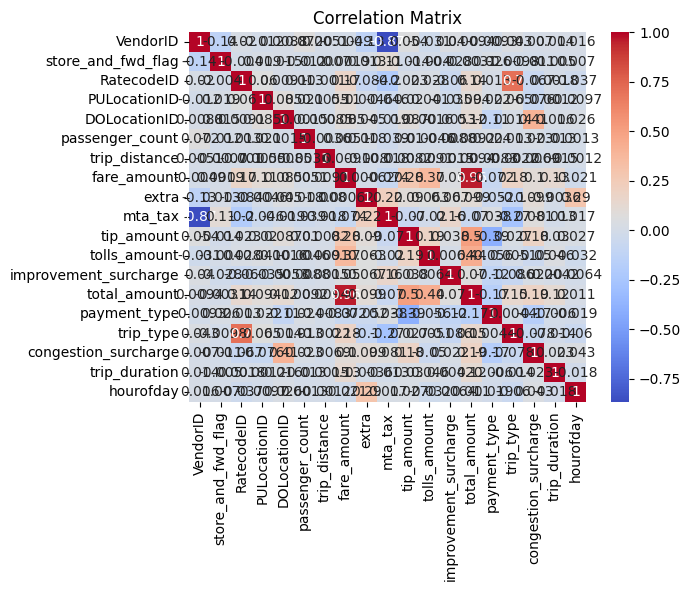

In [14]:
# Convert 'store_and_fwd_flag' to numeric representation
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

# Calculate correlation matrix only on numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

print(correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
encoded_data = pd.get_dummies(data, columns=['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hourofday'])
encoded_data.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,hourofday_14,hourofday_15,hourofday_16,hourofday_17,hourofday_18,hourofday_19,hourofday_20,hourofday_21,hourofday_22,hourofday_23
0,2,2023-05-01 00:52:10,2023-05-01 01:05:26,244,213,1.0,6.99,28.90,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
1,2,2023-05-01 00:29:49,2023-05-01 00:50:11,33,100,1.0,6.60,30.30,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
2,2,2023-05-01 00:25:19,2023-05-01 00:32:12,244,244,1.0,1.34,9.30,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
3,2,2023-05-01 00:07:06,2023-05-01 00:27:33,82,75,1.0,7.79,22.73,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2,2023-05-01 00:43:31,2023-05-01 00:46:59,69,169,1.0,0.70,6.50,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False


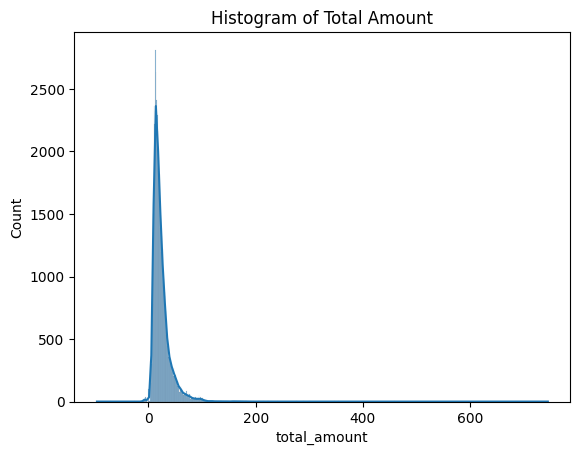

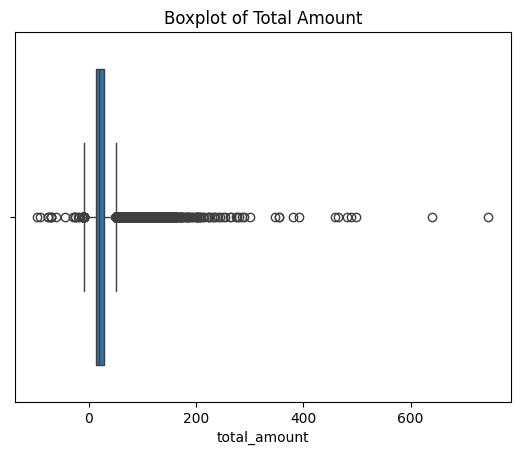

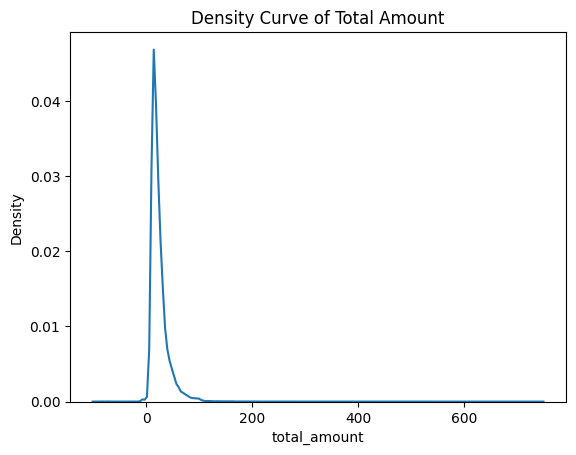

In [16]:
import seaborn as sns

# Histogram of total_amount
sns.histplot(data['total_amount'], kde=True)
plt.title("Histogram of Total Amount")
plt.show()

# Boxplot of total_amount
sns.boxplot(x=data['total_amount'])
plt.title("Boxplot of Total Amount")
plt.show()

# Density plot of total_amount
sns.kdeplot(data['total_amount'])
plt.title("Density Curve of Total Amount")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop datetime columns and any irrelevant features
X = encoded_data.drop(columns=['total_amount', 'lpep_pickup_datetime', 'lpep_dropoff_datetime'])
y = encoded_data['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ 2.74331430e-01 -2.28437570e-04  3.95625080e-04 -4.77775786e-04
 -6.83536098e-06  1.00139310e+00  8.47131748e-01 -3.37704925e-01
  1.00426489e+00  9.96547134e-01  1.35923121e+00  8.55562166e-01
  2.78873448e-05 -5.70724214e-02  5.70724214e-02  2.36987951e-01
  1.39607682e-01 -4.02539835e-01 -1.03361951e-01 -5.09065236e-01
  6.38371388e-01  1.24826817e-01  1.01006688e-01 -1.15053286e-01
 -1.10780219e-01 -1.49880108e-15  4.14713302e-02 -4.14713302e-02
  3.04553214e-02  1.22357256e-02 -7.35050921e-02 -7.79810940e-02
  4.24382133e-02  3.55061575e-02  3.08507683e-02  5.90754882e-03
 -2.26077508e-03 -9.41705819e-03  2.36967477e-02 -1.66517326e-02
  2.34444447e-02 -5.84304803e-02 -8.43443384e-02 -7.69045301e-02
 -8.34274570e-02 -5.43844411e-02 -5.55753223e-02 -5.42600860e-02
 -6.43521681e-02 -8.68045748e-02 -1.02791932e-01  1.06247894e-01
  1.71072368e-01  1.61814919e-01  1.58240701e-01  5.45600239e-02
  1.97532800e-02  1.78783183e-02  6.98865020e-03]
Model Intercept: -0.

In [20]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [23]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.30.159.139:8501

  Stopping...
  Stopping...
